1. Divide the data in the file Vertebral column 3C.dat into a training set and a test set, and do
the following:
(a) Select two features and train a decision tree, calculate prediction accuracy and plot the
decision regions.
(b) Use all features to train a decision tree and calculate prediction accuracy

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

columns = ['Pelvic incidence', 'Pelvic tilt', 'Lumbar lordosis angle',
           'Sacral slope', 'Pelvic radius', 'Grade of spondylolisthesis', 'Class']

# load the dataset into a pd df
file_path = 'Vertebral_column_3C.dat' 
data = pd.read_csv(file_path, delimiter=' ', names=columns)
data = data.dropna()

#convert categorical into numerical data
data.loc[data["Class"] == "DH", "Class"] = 0
data.loc[data["Class"] == "SL", "Class"] = 1
data.loc[data["Class"] == "NO", "Class"] = 2


# split the data into training and testing
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
#code for plotting part a - 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay 
import numpy as np

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')   

Accuracy: 0.6237
hi


c:\Users\hanna\ECE_548\ece-548-ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


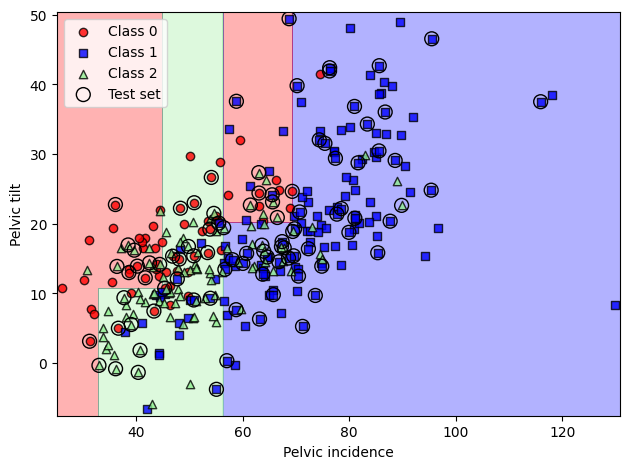

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# part a 
# pick two features - I will use pelvic incidence and pelvic tilt

X_train_a = X_train[['Pelvic incidence', 'Pelvic tilt']]
X_test_a = X_test[['Pelvic incidence', 'Pelvic tilt']]

#convert to ints to ensure working with DeciionTreeClassifier
y_train = y_train.astype(int)
y_test = y_test.astype(int)


# train model on only those features
tree_model_a = DecisionTreeClassifier(criterion='gini',
                                      max_depth=3, 
                                      random_state=1                                     
                                      )
tree_model_a.fit(X_train_a, y_train)
y_pred_a = tree_model_a.predict(X_test_a)

#print accuracy score for part a
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_a))


#plot the decison regions
X_combined_a = np.vstack((X_train_a, X_test_a))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_a, y_combined, classifier=tree_model_a, test_idx=range(len(X_train_a), len(X_combined_a)))

plt.xlabel('Pelvic incidence')
plt.ylabel('Pelvic tilt')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()




In [37]:
#part b - based on all features

tree_model_b = DecisionTreeClassifier(criterion='gini',
                                      max_depth=3, 
                                      random_state=1                                     
                                      )
tree_model_b.fit(X_train, y_train)
y_pred_b = tree_model_b.predict(X_test)

#print accuracy score for part a
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_b))



Accuracy: 0.7527
